In [1]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

In [2]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
#library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots

# Dataset
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'rgl'


The following object is masked from 'package:plotrix':

    mtext3d




In [4]:
#Question 2 Chapter 2

a.
Regression Problem, inference as we are interested in knowing influencing of elements on CEO salary
n = 500
p = profit, number of employees, industry


Classification Problem, prediction as we are interested in knowing which product will be a success
n = 20
p = price charged, marketing budget,competition price, plus 10 variables

c.
Regression Problem, prediction
n = 365
p = % US market, % Britsh market, % German market

In [10]:
#Question 2 Chapter 2

a.
library(MASS)

str(Boston)

?Boston

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


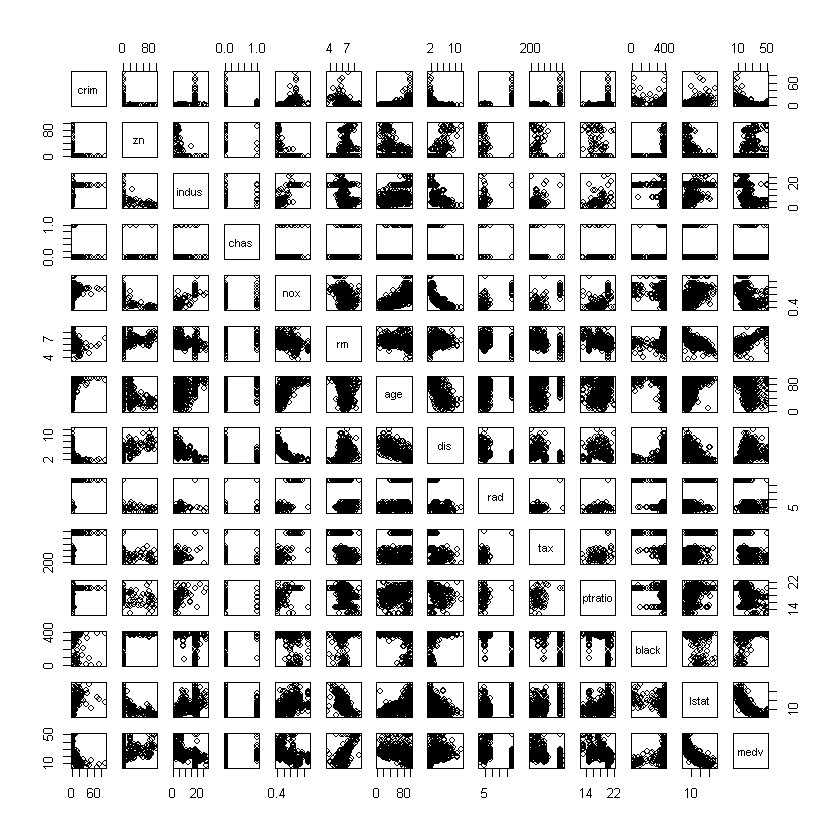

In [32]:
#https://r-coder.com/scatter-plot-r/
b.
pairs(~crim + zn + indus + chas + nox  + rm + age + dis + rad + tax + ptratio + black + lstat + medv , data = Boston)

In [ ]:
library("pairsD3")

shinypairs(Boston[,1:14])

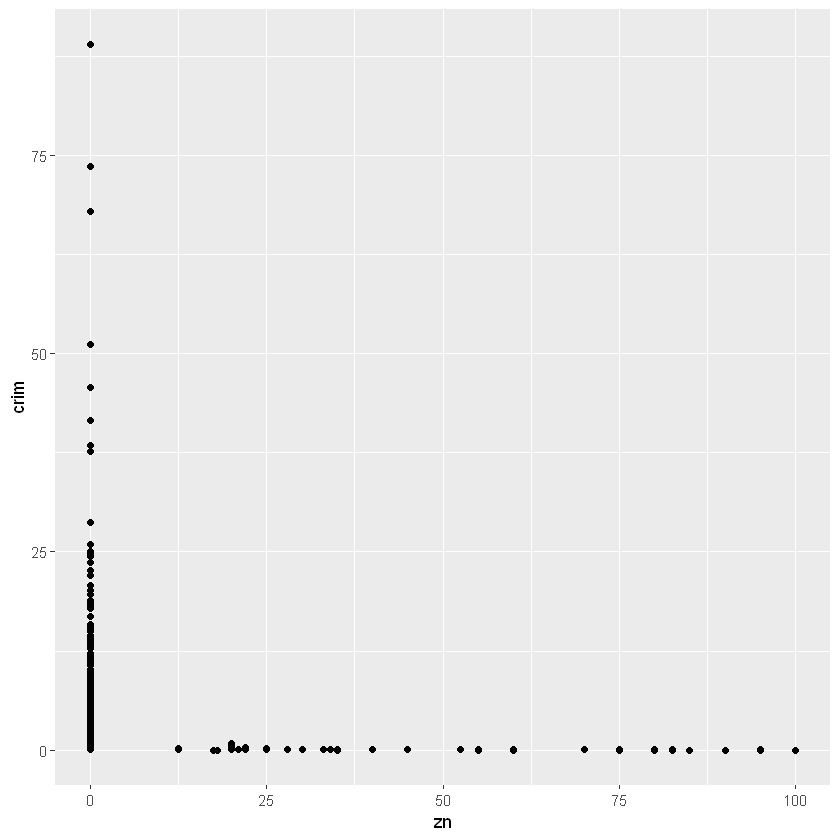

In [9]:
#C.
ggplot(Boston, aes(x = zn, y = crim)) +
  geom_point()
#Crime rate is higher on zn 0

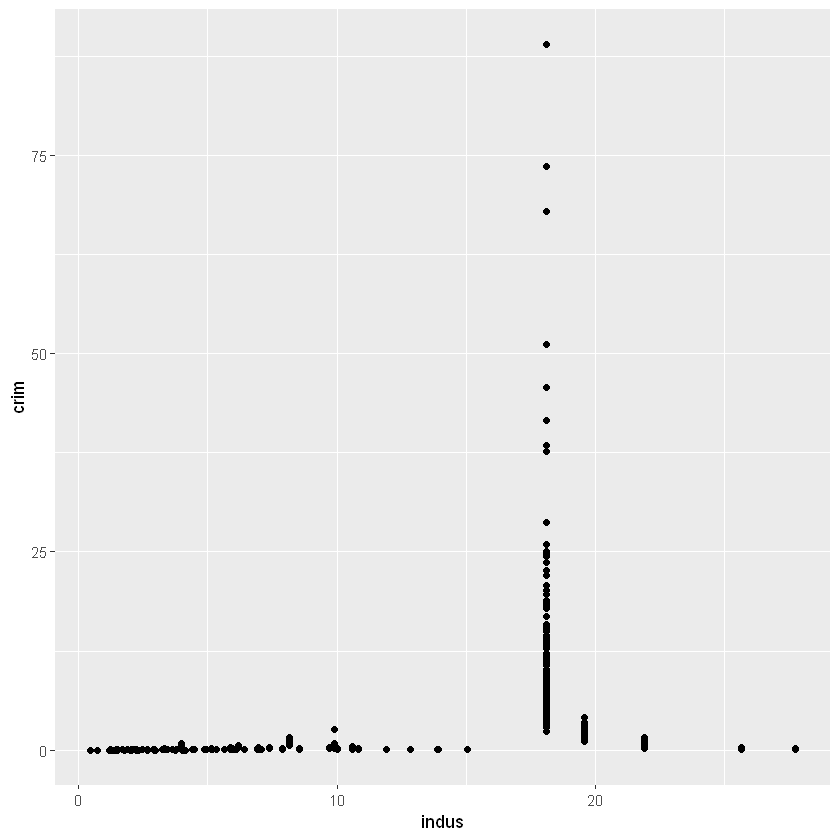

In [10]:
ggplot(Boston, aes(x = indus, y = crim)) +
  geom_point()

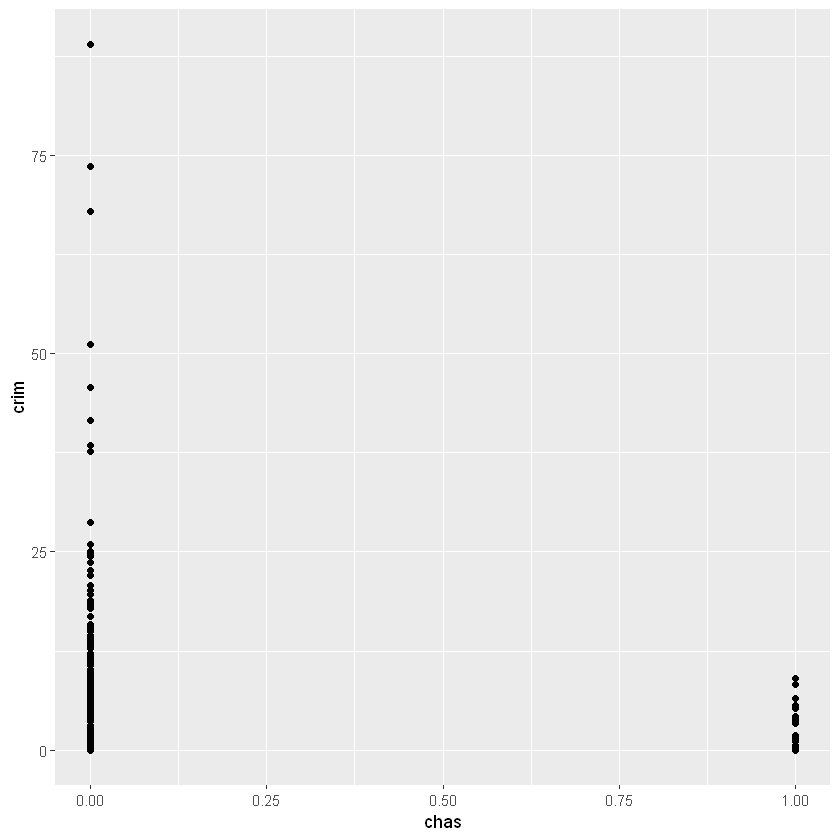

In [12]:
ggplot(Boston, aes(x = chas, y = crim)) +
  geom_point()
#Crime Rate is highere when chas is zero

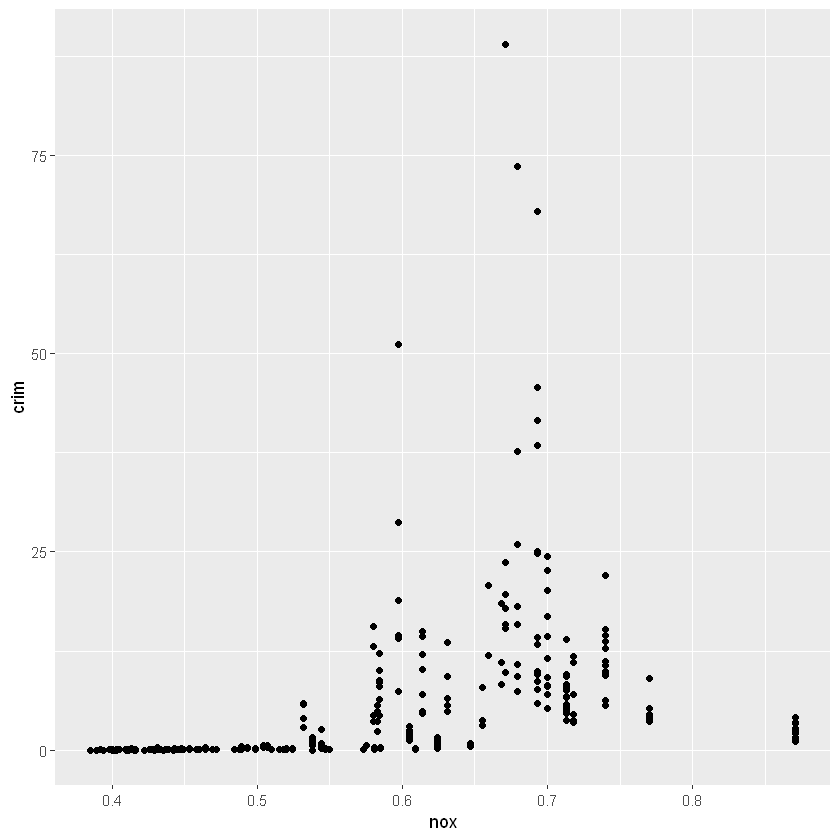

In [13]:
ggplot(Boston, aes(x = nox, y = crim)) +
  geom_point()

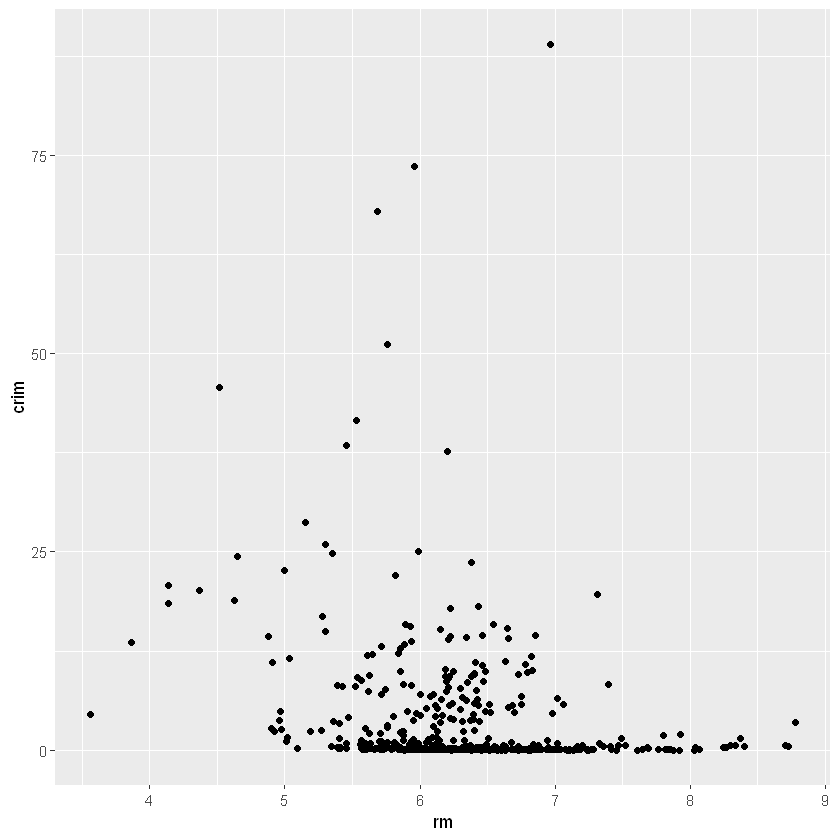

In [14]:
ggplot(Boston, aes(x = rm, y = crim)) +
  geom_point()

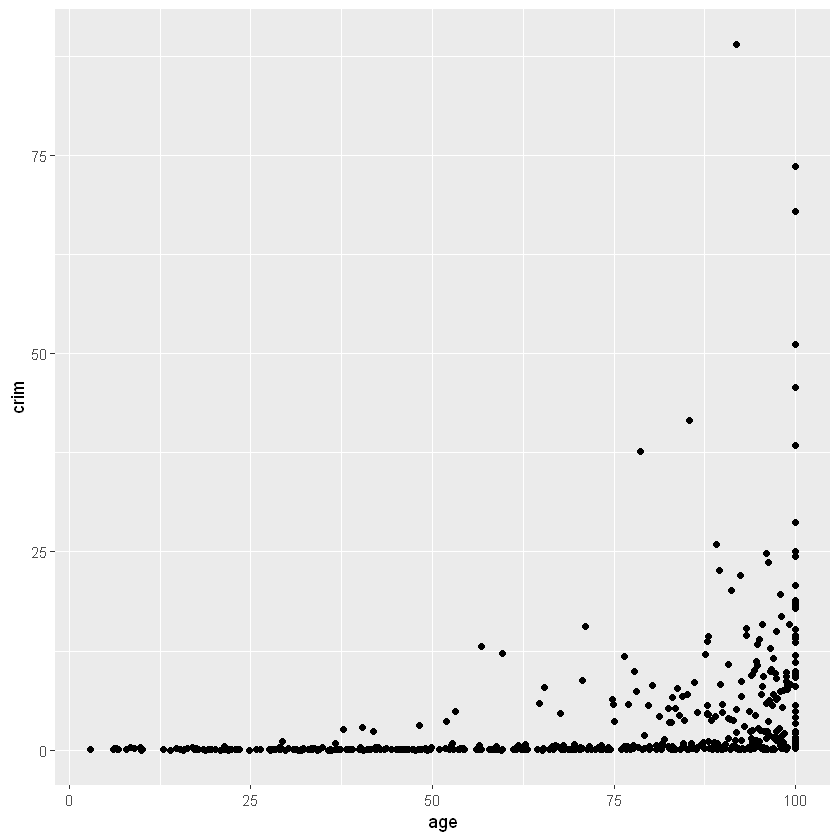

In [15]:
ggplot(Boston, aes(x = age, y = crim)) +
  geom_point()

# As age increasees crime rate increases

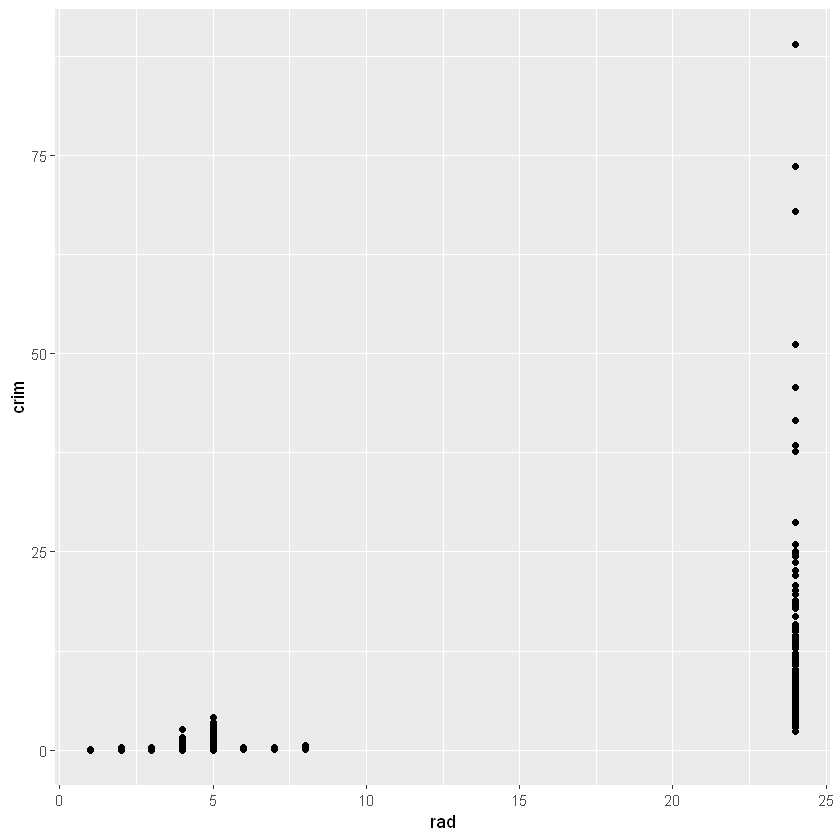

In [17]:
ggplot(Boston, aes(x = dis, y = crim)) +
  geom_point()

# As dis increasees crime rate increases

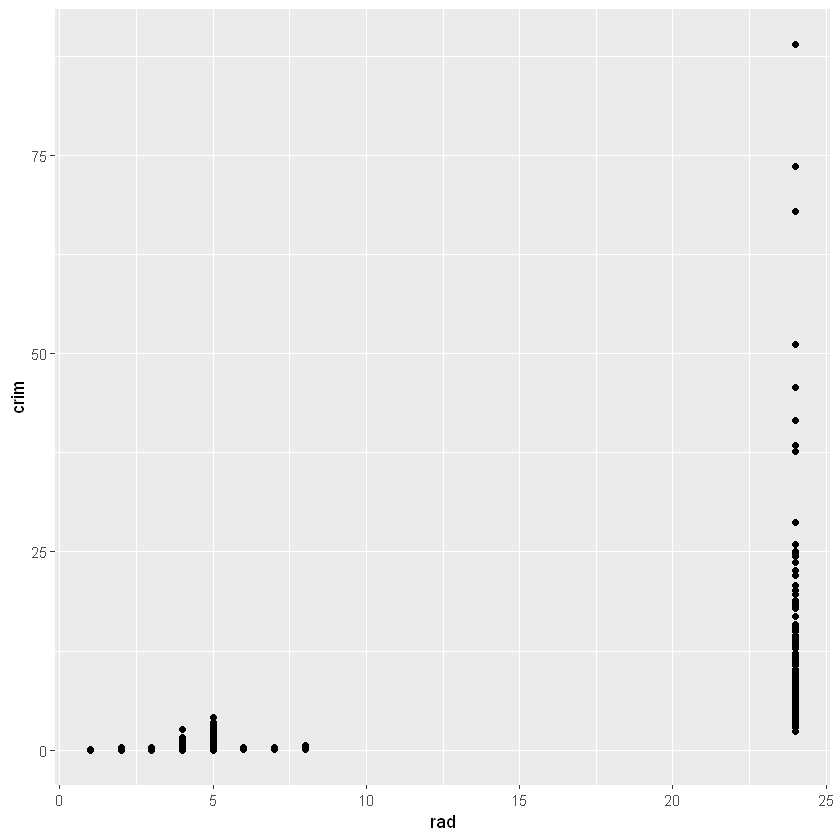

In [18]:
ggplot(Boston, aes(x = rad, y = crim)) +
  geom_point()

# As rad increasees crime rate increases

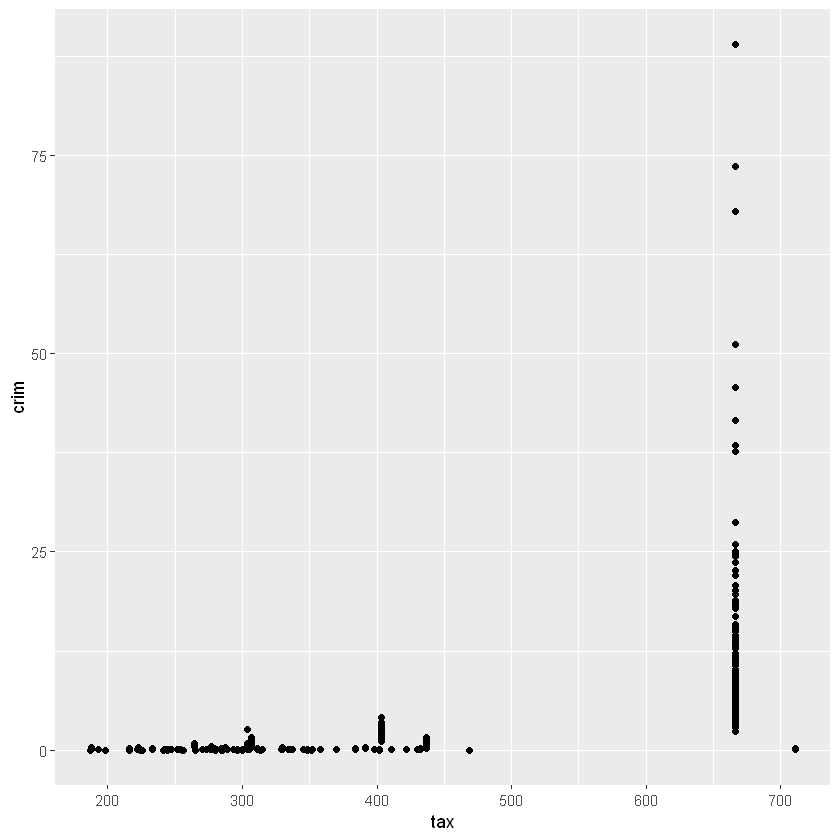

In [20]:
ggplot(Boston, aes(x = tax, y = crim)) +
  geom_point()

# As tax increasees crime rate increases

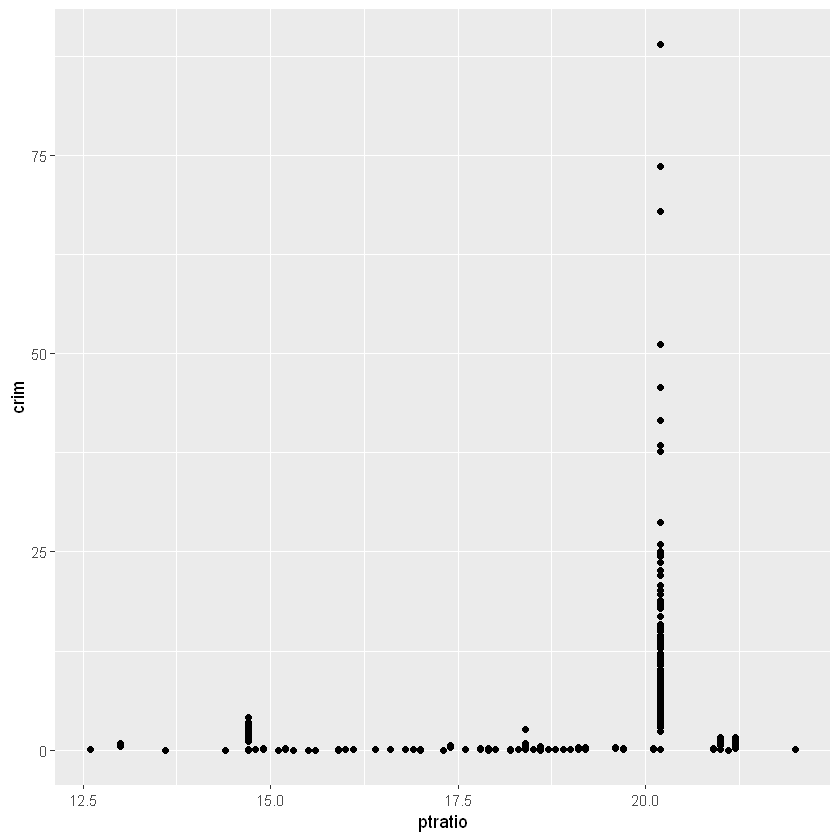

In [22]:
ggplot(Boston, aes(x =  ptratio, y = crim)) +
  geom_point()

# As ptratio increasees crime rate increases

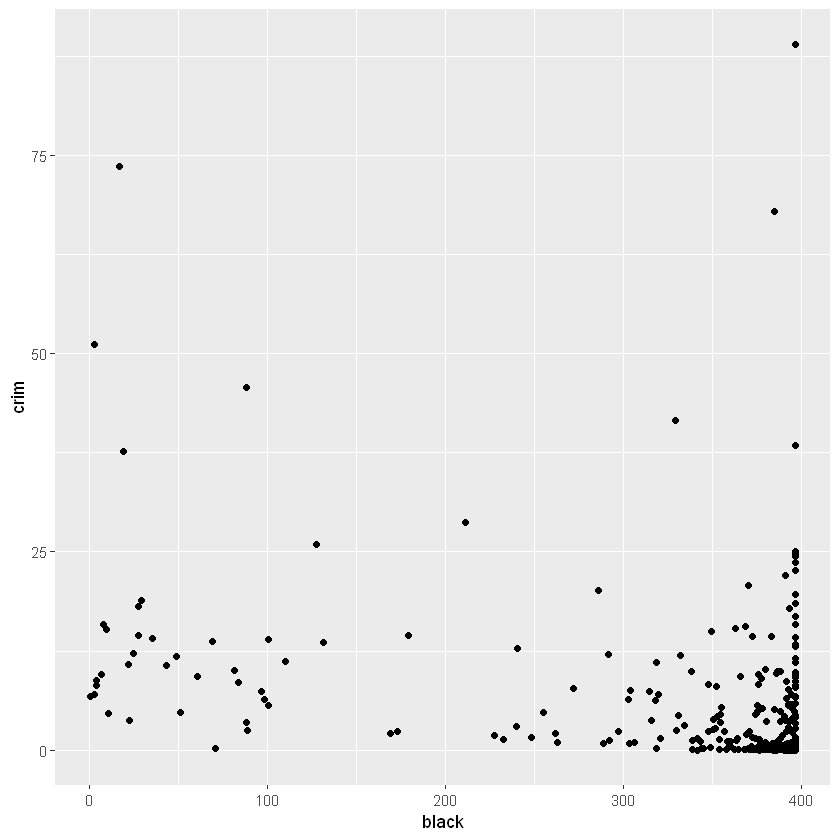

In [23]:
ggplot(Boston, aes(x =  black, y = crim)) +
  geom_point()

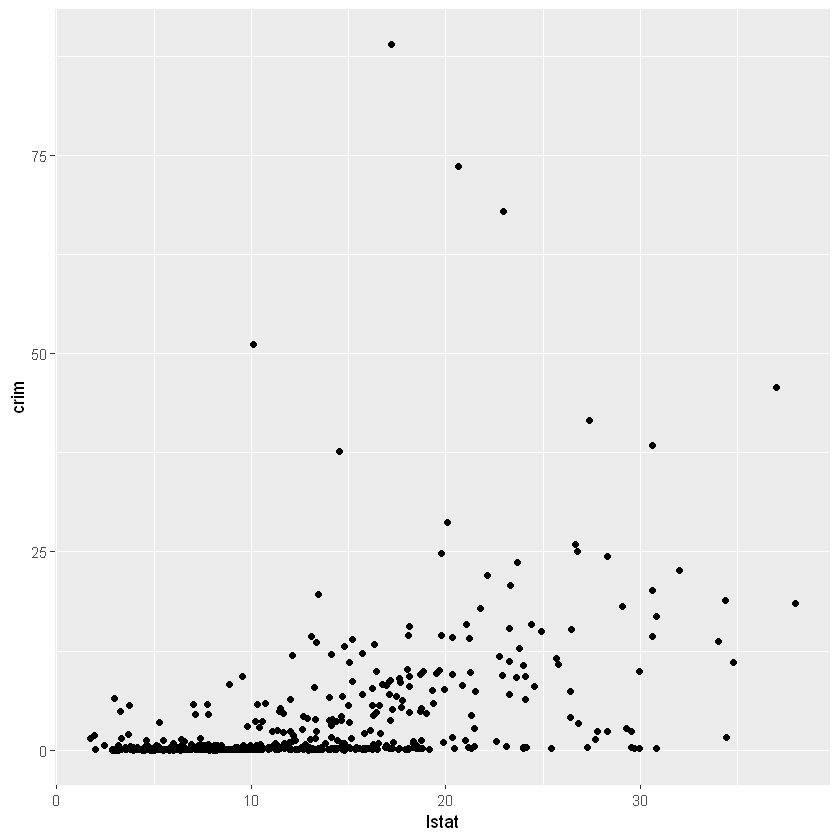

In [24]:
ggplot(Boston, aes(x =  lstat, y = crim)) +
  geom_point()

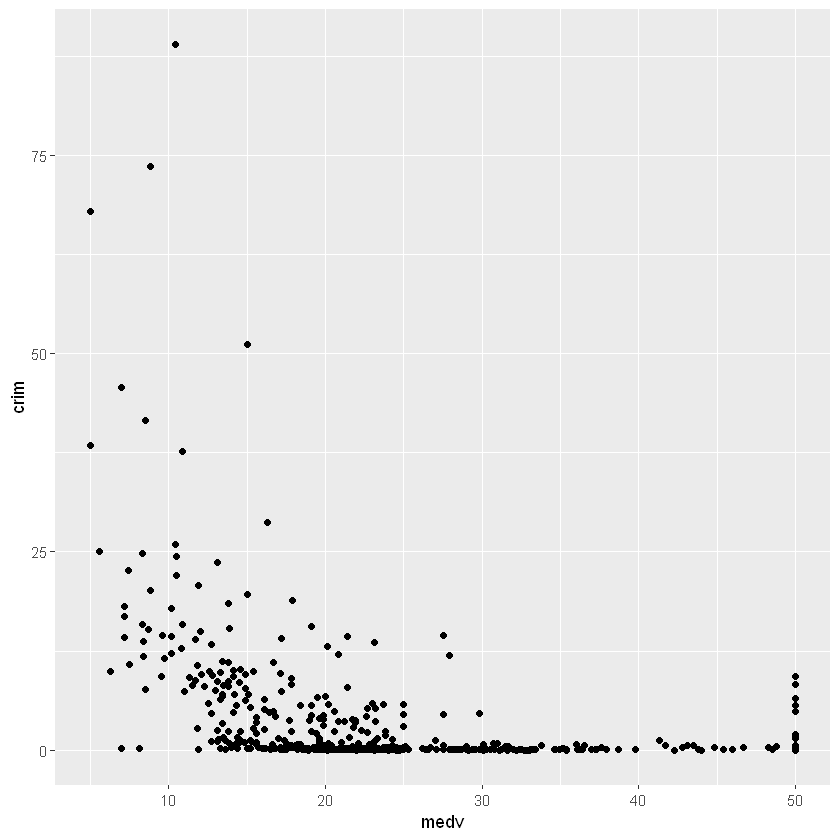

In [25]:
ggplot(Boston, aes(x =  medv, y = crim)) +
  geom_point()

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

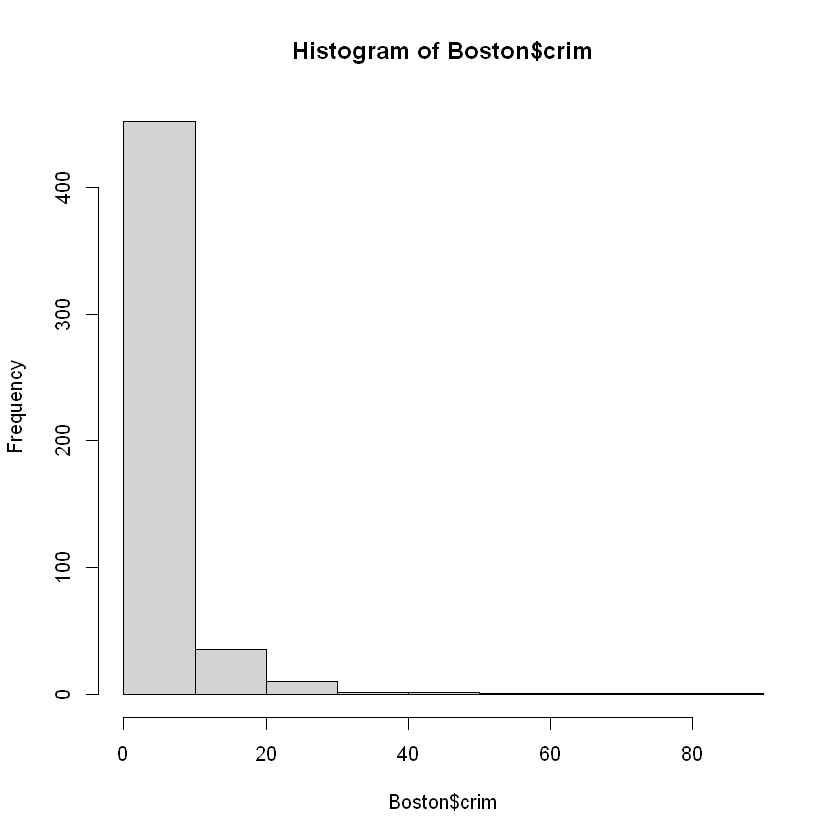

In [27]:
# Part D

summary(Boston$crim)
hist(Boston$crim)
# Yes, Boston has a max crime rate for 88.976 and the range is 0.00632 -  88.97620 with median  0.25651

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.0   279.0   330.0   408.2   666.0   711.0 

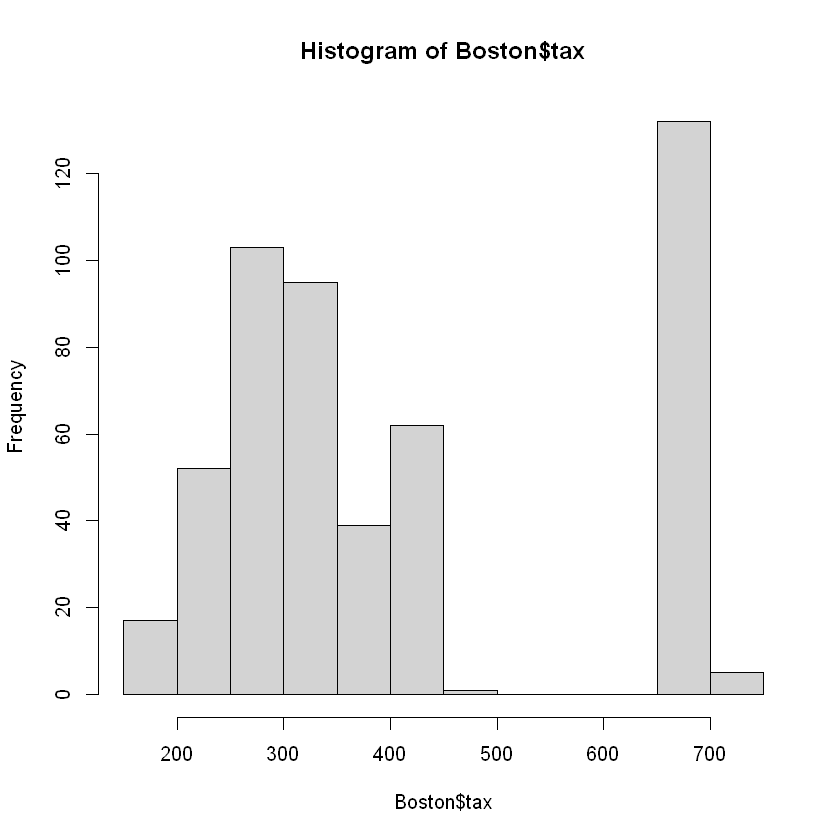

In [28]:
summary(Boston$tax)
hist(Boston$tax)
# Boston has a higher tax rate for 711.0 and the range is 200 -  711.0 with median  330.0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

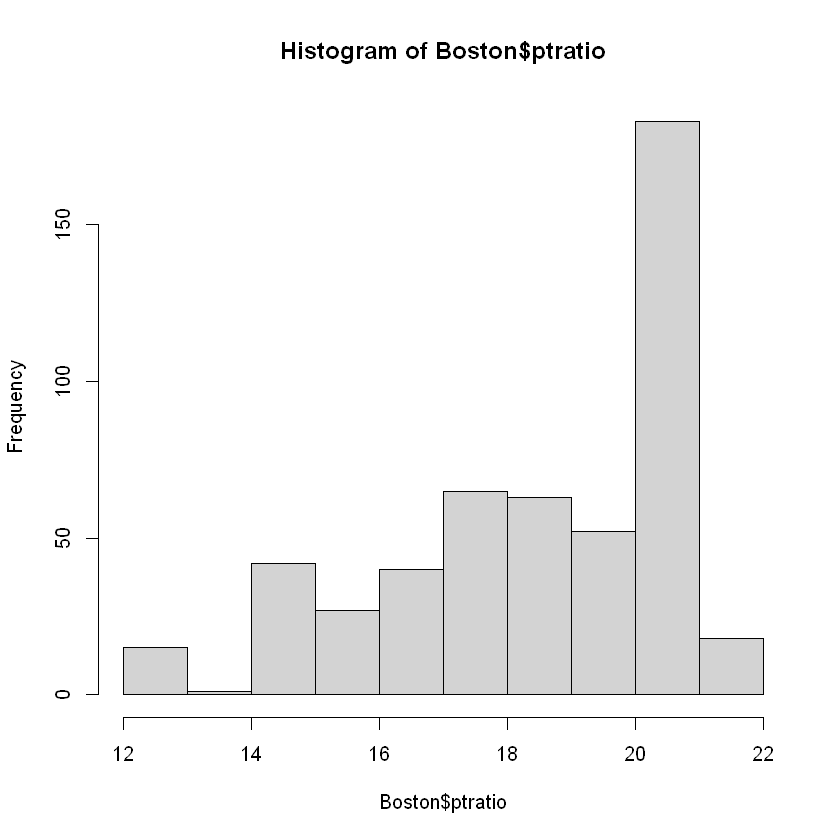

In [29]:
summary(Boston$ptratio)
hist(Boston$ptratio)

# Boston has a higher ptratio for 22.00  and the range is 12.60 -  22.00  with median  19.05

In [36]:
# Part E

b <- Boston[Boston['chas'] == 1, ]

nrow(b)

[1] 35

In [37]:
# Part F

median(Boston$ptratio)

[1] 19.05

In [40]:
#Part G
min = min(Boston$medv)
b <- Boston[Boston['medv'] == min, ]
summary(b)
summary(Boston)
#CRime rate is high for areas with min medv compared to remaining city

      crim             zn        indus           chas        nox       
 Min.   :38.35   Min.   :0   Min.   :18.1   Min.   :0   Min.   :0.693  
 1st Qu.:45.74   1st Qu.:0   1st Qu.:18.1   1st Qu.:0   1st Qu.:0.693  
 Median :53.14   Median :0   Median :18.1   Median :0   Median :0.693  
 Mean   :53.14   Mean   :0   Mean   :18.1   Mean   :0   Mean   :0.693  
 3rd Qu.:60.53   3rd Qu.:0   3rd Qu.:18.1   3rd Qu.:0   3rd Qu.:0.693  
 Max.   :67.92   Max.   :0   Max.   :18.1   Max.   :0   Max.   :0.693  
       rm             age           dis             rad          tax     
 Min.   :5.453   Min.   :100   Min.   :1.425   Min.   :24   Min.   :666  
 1st Qu.:5.511   1st Qu.:100   1st Qu.:1.441   1st Qu.:24   1st Qu.:666  
 Median :5.568   Median :100   Median :1.458   Median :24   Median :666  
 Mean   :5.568   Mean   :100   Mean   :1.458   Mean   :24   Mean   :666  
 3rd Qu.:5.625   3rd Qu.:100   3rd Qu.:1.474   3rd Qu.:24   3rd Qu.:666  
 Max.   :5.683   Max.   :100   Max.   :1.490   Max. 

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [42]:
# Part H
b <- Boston[Boston['rm'] > 7 , ]
b1 <- Boston[Boston['rm'] > 8 , ]

summary(b)
summary(b1)

      crim                zn            indus             chas      
 Min.   : 0.00906   Min.   : 0.00   Min.   : 0.460   Min.   :0.000  
 1st Qu.: 0.04502   1st Qu.: 0.00   1st Qu.: 2.460   1st Qu.:0.000  
 Median : 0.09786   Median :20.00   Median : 3.970   Median :0.000  
 Mean   : 0.97911   Mean   :28.17   Mean   : 5.776   Mean   :0.125  
 3rd Qu.: 0.54289   3rd Qu.:45.00   3rd Qu.: 6.200   3rd Qu.:0.000  
 Max.   :19.60910   Max.   :95.00   Max.   :19.580   Max.   :1.000  
      nox               rm             age              dis       
 Min.   :0.3940   Min.   :7.007   Min.   :  8.40   Min.   :1.202  
 1st Qu.:0.4303   1st Qu.:7.183   1st Qu.: 36.00   1st Qu.:2.445  
 Median :0.4880   Median :7.414   Median : 63.80   Median :3.495  
 Mean   :0.5045   Mean   :7.570   Mean   : 60.64   Mean   :4.200  
 3rd Qu.:0.5825   3rd Qu.:7.859   3rd Qu.: 85.03   3rd Qu.:5.463  
 Max.   :0.7180   Max.   :8.780   Max.   :100.00   Max.   :9.223  
      rad              tax           ptratio    

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

In [ ]:
# Question 3 Chapter 3

Y = 50 + 20(gpa) + 0.07(iq) + 35(gender) + 0.01(c(gpa,iq)) - 10 (c(gpa,gender))
A 
False. Given the coefficient is 35 Females will earn more.

B.
True. 

C.
True. If Gpa is high enough Males will earn more

D.
True. If Gpa is high enough Females will earn more


2.
50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(c(4.0,110)) - 10 (c(4.0,1))

3.
False. We need to check P value to determine significance.

In [44]:
# Question 10 Chapter 3
#A.
lm.fit = lm(Sales~Price+Urban+US, data=Carseats)
summary(lm.fit)



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


In [ ]:
B.
Based on p value beig less than 0.005 we can say that price, USYes have a relationship with sales. Price is inversely proportional to sales while USYes is directly proportional.

In [ ]:
C.
13.043 - 0.054459(Price) -0.021916(UrbanYes) + 1.200573(USYes)

In [ ]:
D.
price, USYes we can reject null hypothesis

In [46]:
#E
lm.fit2 = lm(Sales ~ Price + US, data=Carseats)
summary(lm.fit2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


In [ ]:
#F
model 2 performs better than model 1

In [58]:
# 15
#A

colnames(Boston)
lm.fit = lm(crim~zn, data=Boston)
summary(lm.fit)


[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"


Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06


In [59]:
lm.fit = lm(crim~indus, data=Boston)
summary(lm.fit)


Call:
lm(formula = crim ~ indus, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.866 on 504 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1637 
F-statistic: 99.82 on 1 and 504 DF,  p-value: < 2.2e-16


In [60]:
lm.fit = lm(crim~chas, data=Boston)
summary(lm.fit)


Call:
lm(formula = crim ~ chas, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-3.738 -3.661 -3.435  0.018 85.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7444     0.3961   9.453   <2e-16 ***
chas         -1.8928     1.5061  -1.257    0.209    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.597 on 504 degrees of freedom
Multiple R-squared:  0.003124,	Adjusted R-squared:  0.001146 
F-statistic: 1.579 on 1 and 504 DF,  p-value: 0.2094


In [61]:
lm.fit = lm(crim~nox, data=Boston)
summary(lm.fit)


Call:
lm(formula = crim ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.371  -2.738  -0.974   0.559  81.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.720      1.699  -8.073 5.08e-15 ***
nox           31.249      2.999  10.419  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.81 on 504 degrees of freedom
Multiple R-squared:  0.1772,	Adjusted R-squared:  0.1756 
F-statistic: 108.6 on 1 and 504 DF,  p-value: < 2.2e-16
